# Audit Salary

## Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read 2017-2018 NBA Regular Season Players' Salary


In [25]:
df_sal = pd.read_csv("/Users/QiJin/Desktop/Python/NBA_season1718_salary.csv")
df_sal.head()

,ID,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


## Read 2017-2018 NBA Regular Season All Star Players List

In [26]:
df_star = pd.read_csv("/Users/QiJin/Desktop/Python/allstar.csv")
df_star

,Name,PlayerID,Position,Team,TeamID
0,Kyrie Irving,20000574,Scrambled,EAST,31
1,LeBron James,20000571,Scrambled,EAST,31
2,Kevin Durant,20000884,Scrambled,EAST,31
3,LaMarcus Aldridge,20000616,Scrambled,EAST,31
4,Anthony Davis,20000468,Scrambled,EAST,31
5,DeMarcus Cousins,20000862,Scrambled,EAST,31
6,Russell Westbrook,20000877,Scrambled,EAST,31
7,Bradley Beal,20000441,Scrambled,EAST,31
8,Victor Oladipo,20000689,Scrambled,EAST,31
9,Kristaps Porzingis,20001406,Scrambled,EAST,31


In All Star table, all data except **name** are meaningless in our database. So I will delete all star table and add one column in salary table to determine whether the player is one of all star.

In [27]:
AllStarList = list()

In [28]:
for name in list(df_sal['Player']):
    if name in list(df_star['Name']):
        AllStarList.append('True') 
    else:
        AllStarList.append('False')

In [29]:
df_sal['AllStar']= AllStarList

In [30]:
df_sal.head()

,ID,Player,Tm,season17_18,AllStar
0,1,Stephen Curry,GSW,34682550.0,True
1,2,LeBron James,CLE,33285709.0,True
2,3,Paul Millsap,DEN,31269231.0,False
3,4,Gordon Hayward,BOS,29727900.0,False
4,5,Blake Griffin,DET,29512900.0,False


In our database, ID can not be the index for searching players in other tables. So I will delete ID column

In [31]:
df = df_sal.drop(['ID'], axis=1)


And Change the title of **Tm** and **season17_18** to **Team** and **Salary** to be consistent with other tables.

In [32]:
df.rename({'Tm': 'Team', 'season17_18': 'Salary'},axis='columns',inplace= True)
df= df.set_index(['Player'])
df.head()

,Team,Salary,AllStar
Player,,,
Stephen Curry,GSW,34682550.0,True
LeBron James,CLE,33285709.0,True
Paul Millsap,DEN,31269231.0,False
Gordon Hayward,BOS,29727900.0,False
Blake Griffin,DET,29512900.0,False


## Check the size of Data

In [33]:
df.shape

(573, 3)

In [34]:
df.isnull().sum()

Team       0
Salary     0
AllStar    0
dtype: int64

#### Perfect!

{'whiskers': [<matplotlib.lines.Line2D at 0x1a170dee80>,
 'caps': [<matplotlib.lines.Line2D at 0x1a170e7710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a170de940>],
 'medians': [<matplotlib.lines.Line2D at 0x1a170e7f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1706e3c8>],
 'means': []}

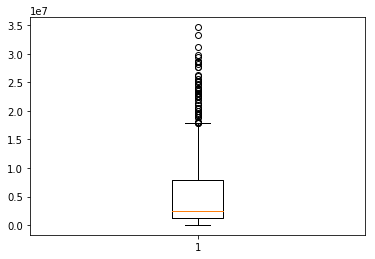

In [35]:
plt.boxplot(df['Salary'])

To check whether the data is correct, we choose to compare the salary of all stars with the data from internet.

In [36]:
df2 = df[df['AllStar'] == 'True']

In [37]:
df2.loc[:,['Salary']]

,Salary
Player,
Stephen Curry,34682550.0
LeBron James,33285709.0
Kyle Lowry,28703704.0
Russell Westbrook,28530608.0
James Harden,28299399.0
DeMar DeRozan,27739975.0
Al Horford,27734405.0
Damian Lillard,26153057.0
Kevin Durant,25000000.0


Compare with Wikipedia, they are correct!

In [38]:
df['Salary'].median()

2386864.0

In [39]:
df['Salary'].mean()

5858945.886561954

In [40]:
df['Salary'].max()

34682550.0

In [41]:
df['Salary'].min()

17224.0

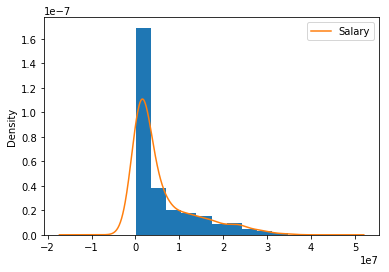

In [42]:
fig, ax = plt.subplots()
hist = plt.hist(df['Salary'],density=True)
df.plot.kde(ax=ax, legend=True)


This makes scense because salaries between NBA players are extremely high.

## Write to a new csv file!

In [43]:
df.to_csv("/Users/QiJin/Desktop/Python/NBA_salary.csv",index=True)

## Done!